In [47]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
import os

In [9]:
datadir = '../data/'
datafiles = os.listdir(datadir)

In [37]:
print datafiles, len(datafiles)

['burglary_heat.csv', 'bus_license.csv', 'crime.csv', 'dat_model.csv', 'food_inspections.csv', 'garbage_carts.csv', 'garbageCarts_heat.csv', 'inspectors.csv', 'sanitation_code.csv', 'sanitationComplaints_heat.csv', 'violation_dat.csv', 'weather_20110401_20141031.csv'] 12


In [ ]:
burg_heat_df = pd.read_csv(datadir + datafiles[0])
bus_license_df = pd.read_csv(datadir + datafiles[1])
crime_df = pd.read_csv(datadir + datafiles[2])
dat_model_df = pd.read_csv(datadir + datafiles[3])
food_inspections_df = pd.read_csv(datadir + datafiles[4])
garbage_carts_df = pd.read_csv(datadir + datafiles[5])
garbageCarts_heat_df = pd.read_csv(datadir + datafiles[6])
inspectors_df = pd.read_csv(datadir + datafiles[7])
sanitation_code_df = pd.read_csv(datadir + datafiles[8])
sanitationComplaints_heat_df = pd.read_csv(datadir + datafiles[9])
violation_dat_df = pd.read_csv(datadir + datafiles[10])
weather_df = pd.read_csv(datadir + datafiles[11])


dfs = [burg_heat_df, 
        bus_license_df ,
        crime_df ,
        dat_model_df ,
        food_inspections_df ,
        garbage_carts_df ,
        garbageCarts_heat_df ,
        inspectors_df ,
        sanitation_code_df ,
        sanitationComplaints_heat_df ,
        violation_dat_df ,
        weather_df]

for df in dfs:
    if 'Unnamed: 0' in dataframes[i]:
        del df['Unnamed: 0']

# Crime Data

In [45]:
crime_df.columns

Index([u'Unnamed: 0', u'ID', u'Case_Number', u'Date', u'Block', u'IUCR',
       u'Primary_Type', u'Description', u'Location_Description', u'Arrest',
       u'Domestic', u'Beat', u'District', u'Ward', u'Community_Area',
       u'FBI_Code', u'X_Coordinate', u'Y_Coordinate', u'Year', u'Updated_On',
       u'Latitude', u'Longitude', u'Location'],
      dtype='object')

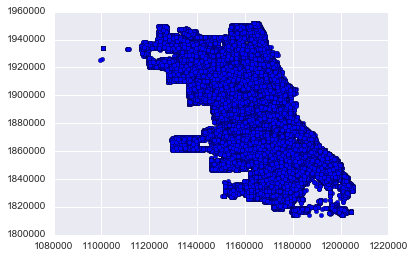

In [48]:
xloc = crime_df['X_Coordinate']
yloc = crime_df['Y_Coordinate']

plt.figure()
plt.scatter(xloc, yloc)
plt.show()
